In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization
from keras.models import *
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import keras
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import rasterio
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import sys
import PIL
from PIL import Image
from keras.applications.vgg16 import VGG16

2023-01-17 16:33:13.965026: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-17 16:33:14.076212: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-17 16:33:14.076228: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-17 16:33:14.730297: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
train_path="/home/avni/Desktop/rgb_jpg/rgb/train/"
test_path="/home/avni/Desktop/rgb_jpg/rgb/test/"

In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [4]:
vgg_model = Sequential()

pretrained_model= VGG16(include_top=False,
                   input_shape=(64,32,3),
                   pooling='avg',classes=6,
                   weights='imagenet',
                   )
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(256, activation='relu'))
vgg_model.add(Dense(128, activation='relu'))
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(6, activation='softmax'))

2023-01-17 16:33:16.119284: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 16:33:16.119500: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/avni/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-17 16:33:16.119557: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/avni/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-17 16:33:16.119609: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.c

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 32),
  batch_size=32)

Found 15282 files belonging to 6 classes.
Using 12226 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 32),
  batch_size=32)

Found 4500 files belonging to 6 classes.
Using 900 files for validation.


In [7]:
train_gen = ImageDataGenerator(train_ds)
test_gen=ImageDataGenerator(val_ds)

In [8]:
vgg_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [9]:
from tensorflow.keras.optimizers import Adam
vgg_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
epochs=25
checkpoint_filepath = '/tmp/checkpoint'

history = vgg_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[
    tf.keras.callbacks.EarlyStopping(
      monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=True,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True),
  ]
)

Epoch 1/10
383/383 [==============================] - 46s 118ms/step - loss: 0.9299 - accuracy: 0.7427 - val_loss: 0.4328 - val_accuracy: 0.8467
Epoch 2/10
383/383 [==============================] - 42s 109ms/step - loss: 0.4481 - accuracy: 0.8411 - val_loss: 0.4085 - val_accuracy: 0.8467
Epoch 3/10
383/383 [==============================] - 42s 110ms/step - loss: 0.3920 - accuracy: 0.8605 - val_loss: 0.3076 - val_accuracy: 0.8867
Epoch 4/10
383/383 [==============================] - 46s 119ms/step - loss: 0.3628 - accuracy: 0.8718 - val_loss: 0.2916 - val_accuracy: 0.8911
Epoch 5/10
383/383 [==============================] - 42s 109ms/step - loss: 0.3457 - accuracy: 0.8765 - val_loss: 0.3180 - val_accuracy: 0.8933
Epoch 6/10
383/383 [==============================] - 41s 108ms/step - loss: 0.3387 - accuracy: 0.8816 - val_loss: 0.3183 - val_accuracy: 0.8744


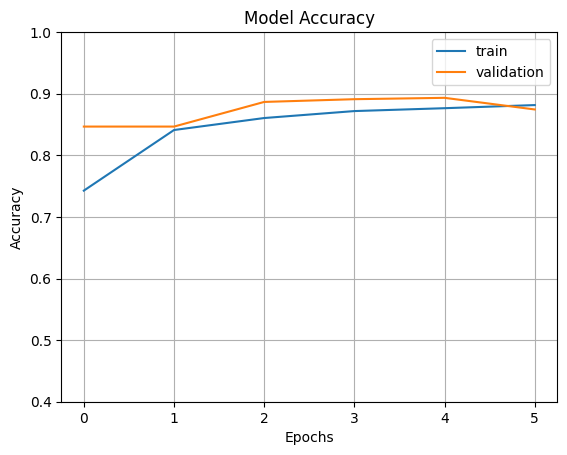

In [11]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

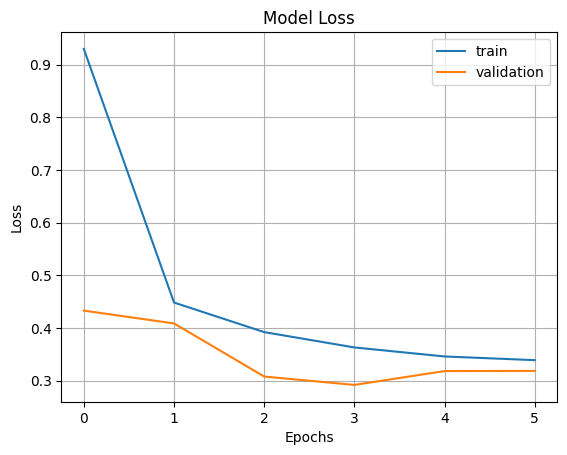

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix

IMAGE_SIZE = [64,32] # feel free to change depending on dataset

def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in test_gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=32):
    i += 1
    if i % 50 == 0:
      print(i)
    p = vgg_model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [14]:
image_files = glob(train_path+ '/*/*.jp*g')
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)

Generating confusion matrix 15282
Found 15282 images belonging to 6 classes.


/home/avni/miniconda3/envs/tf/lib/python3.9/site-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
50
1/1 [==============================] - 0s 99ms/step
100
1/1 [==============================] - 0s 106ms/step
150
1/1 [==============================] - 0s 110ms/step
200
1/1 [==============================] - 0s 107ms/step
250
1/1 [==============================] - 0s 103ms/step
300
1/1 [==============================] - 0s 111ms/step
350
1/1 [==============================] - 0s 101ms/step
400
1/1 [==============================] - 0s 107ms/step
450
1/1 [==============================] - 0s 166ms/step
[[2386    0    3    0   64  120]
 [   1 2011   68  148    0  342]
 [   1  109 2259   60    0   71]
 [   0   85   30 2351    0   36]
 [  61    0    0    0 2465   42]
 [  54   54   44   48   13 2356]]


In [15]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[2386    0    3    0   64  120]
 [   1 2011   68  148    0  342]
 [   1  109 2259   60    0   71]
 [   0   85   30 2351    0   36]
 [  61    0    0    0 2465   42]
 [  54   54   44   48   13 2356]]


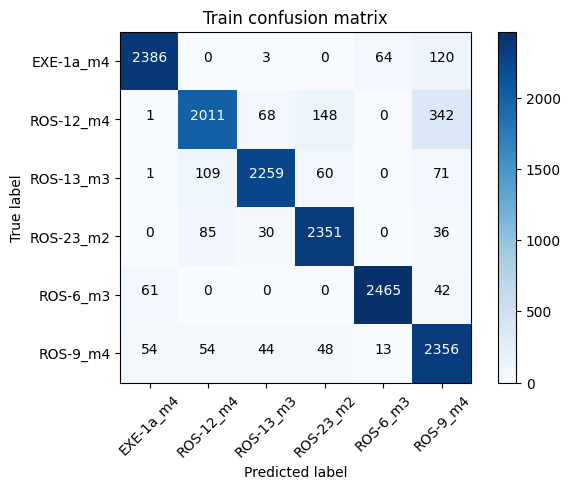

In [16]:
labels={'EXE-1a_m4': 0, 'ROS-12_m4': 1, 'ROS-13_m3': 2, 'ROS-23_m2': 3, 'ROS-6_m3': 4, 'ROS-9_m4': 5}
plot_confusion_matrix(cm, labels, title='Train confusion matrix')

In [17]:
import numpy as np
print("Train Set Accuracy:",np.trace(cm) / cm.sum())

Train Set Accuracy: 0.9048553854207565


In [18]:
test_image_files = glob(test_path+ '/*/*.jp*g')
valid_cm = get_confusion_matrix(test_path, len(test_image_files))
print(valid_cm)

Generating confusion matrix 4500
Found 4500 images belonging to 6 classes.
1/1 [==============================] - 0s 106ms/step


/home/avni/miniconda3/envs/tf/lib/python3.9/site-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
50
1/1 [==============================] - 0s 112ms/step
100
1/1 [==============================] - 0s 71ms/step
[[682   0   0   0  27  41]
 [  1 575  26  43   0 105]
 [  0  46 672  15   0  17]
 [  0  18   8 718   0   6]
 [ 21   0   0   0 709  20]
 [ 13  19  13  13   7 685]]


Confusion matrix, without normalization
[[682   0   0   0  27  41]
 [  1 575  26  43   0 105]
 [  0  46 672  15   0  17]
 [  0  18   8 718   0   6]
 [ 21   0   0   0 709  20]
 [ 13  19  13  13   7 685]]


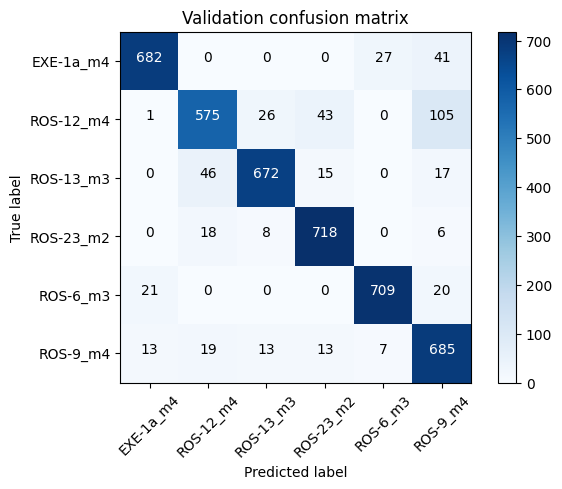

In [19]:
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')

In [20]:
print("Test Set Accuracy:",np.trace(valid_cm) / valid_cm.sum())

Test Set Accuracy: 0.898


In [21]:
vgg_model.save('/home/avni/Desktop/saved_model/my_model.h5')